### Changelog v5
- use batch normalization, no bias at conv <br>
- use preprocess_input
(from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input )
- output layer no batch norm
- use default mse again 
- change loss function
- improve data prerpocess
- from keras.initializers import RandomNormal 
### Changelog v8
- use adam

### Changelog v9
- reduce output density map by 1/8 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import plot_model
import glob

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
base = "C:/CSRNET_output_storage"
base_to_save = base +"/output/5_7_2022/CSR_lite"


In [ ]:
DATA_PATH = base + "/shanghaitech_with_people_density_map/ShanghaiTech/part_A/train_data"
TEST_PATH =  base + "/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data"
MODEL_PATH = "csrnet_shanghaitechA_task1.h5"
MODEL_JSON_PATH = "csrnet_shanghaitechA_task1.json"

In [ ]:
import os
from tqdm import tqdm
import glob
from sklearn.model_selection import train_test_split
import json

def create_training_image_list(data_path):
   
    DATA_PATH = data_path
    image_path_list = glob.glob(os.path.join(DATA_PATH, "images", "*.jpg"))
    return image_path_list


def get_train_val_list(data_path):
    DATA_PATH = data_path
    image_path_list = glob.glob(os.path.join(DATA_PATH, "images", "*.jpg"))
    train, val = train_test_split(image_path_list, test_size=0.1)

    print("train size ", len(train))
    print("val size ", len(val))
    return train, val

def get_test_list(data_path):
    DATA_PATH = data_path
    image_path_list = glob.glob(os.path.join(DATA_PATH, "images", "*.jpg"))
    
    print("test size ", len(image_path_list))
    return image_path_list

def create_density_path_list(image_path_list):
    gt_paths = []
    for img_path in image_path_list:
        gt_path = img_path.replace('.jpg','.h5').replace('images','ground-truth-h5')
        gt_paths.append(gt_path)
    print(len(gt_paths))
    return gt_paths

In [ ]:
from tensorflow.python.keras import backend as K
def mae_metric(y_true, y_pred):
    return K.abs(K.sum(y_true) - K.sum(y_pred))

In [ ]:
from tensorflow.python.keras import backend as K
def euclidean_distance_loss(y_true, y_pred):
   
    return K.sqrt(K.sum(K.sum(K.sum(K.square(y_pred - y_true), axis=3), axis=2), axis=1))


In [ ]:
# #BASELINE MODEL
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import load_model, model_from_json
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


# # from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# # from tensorflow.keras.models import Model
# # from tensorflow.keras.layers import Conv2D, UpSampling2D
# from tensorflow.keras.losses import mean_squared_error


# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation

# from tensorflow.keras.initializers import RandomNormal 
# import numpy as np

# # from tensorflow.python.keras.optimizers import SGD, Adam
# from tensorflow.keras.optimizers import SGD, Adam

# def psnr(y_true, y_pred):
#   return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

# def dice_coef(y_true, y_pred,smooth=1.):
#   y_true_f = K.flatten(y_true)
#   y_pred_f = K.flatten(y_pred)
#   intersection = K.sum(y_true_f * y_pred_f)
#   return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def iou(y_true, y_pred, smooth=1.):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#   union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
#   iou = (intersection + smooth) / ( union + smooth)
#   return iou

# def build_model():
#     sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
#     adam = Adam()
#     vgg16_model = VGG16(weights='imagenet', include_top=False)
#     # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
#     x = vgg16_model.get_layer('block4_conv3').output
#     x = BatchNormalization()(x)
# #     x = UpSampling2D(size=(8, 8))(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
# #     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     model = Model(inputs=vgg16_model.input, outputs=x)
#     model.compile(optimizer=adam,
#                   loss=mean_squared_error, 
#                   metrics=[mae_metric, mean_squared_error,psnr,iou])
#     # model.compile(optimizer=adam,
#     #               loss=mean_squared_error, 
#     #               metrics=[mae_metric])
#     return model

In [ ]:
#Experiment 1

# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.python.keras.models import load_model, model_from_json
# from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# # from tensorflow.keras.models import Model
# # from tensorflow.keras.layers import Conv2D, UpSampling2D
# from tensorflow.python.keras.losses import mean_squared_error


# from tensorflow.python.keras.models import Model
# from tensorflow.python.keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation

# from tensorflow.python.keras.initializers import RandomNormal 
# import numpy as np

# from tensorflow.python.keras.optimizers import SGD, Adam
# # from keras import optimizers

from tensorflow.keras.models import load_model, model_from_json
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


# from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.losses import mean_squared_error


from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation

from tensorflow.keras.initializers import RandomNormal 
import numpy as np

# from tensorflow.python.keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD, Adam
from math import log10, sqrt
from tensorflow.keras import backend as K

def psnr(y_true, y_pred):
  return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

def dice_coef(y_true, y_pred,smooth=1.):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def iou(y_true, y_pred, smooth=1.):
  intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
  union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
  iou = (intersection + smooth) / ( union + smooth)
  return iou
def build_model():
    sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
    adam = Adam()
    vgg16_model = VGG16(weights='imagenet', include_top=False)
    # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
    x = vgg16_model.get_layer('block4_conv3').output
    x = BatchNormalization()(x)
#     x = UpSampling2D(size=(8, 8))(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=16, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=16, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
    x = Activation('relu')(x)
    model = Model(inputs=vgg16_model.input, outputs=x)
    model.compile(optimizer=adam,
                  loss=mean_squared_error, 
                  metrics=[mae_metric, mean_squared_error,psnr,iou])
    
    return model

In [ ]:
# #Experiment 2 sgd
# # from tensorflow.keras.applications.vgg16 import VGG16
# # from tensorflow.python.keras.models import load_model, model_from_json
# # from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# # # from tensorflow.keras.models import Model
# # from tensorflow.keras.layers import Conv2D, UpSampling2D
# # from tensorflow.python.keras.losses import mean_squared_error


# # from tensorflow.python.keras.models import Model
# # from tensorflow.python.keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation

# # from tensorflow.python.keras.initializers import RandomNormal 
# # import numpy as np

# # from tensorflow.python.keras.optimizers import SGD, Adam
# # # from keras import optimizers

# from tensorflow.keras.models import load_model, model_from_json
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


# # from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# # from tensorflow.keras.models import Model
# # from tensorflow.keras.layers import Conv2D, UpSampling2D
# from tensorflow.keras.losses import mean_squared_error


# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation

# from tensorflow.keras.initializers import RandomNormal 
# import numpy as np

# # from tensorflow.python.keras.optimizers import SGD, Adam
# from tensorflow.keras.optimizers import SGD, Adam
# from math import log10, sqrt
# from tensorflow.keras import backend as K

# def psnr(y_true, y_pred):
#   return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

# def dice_coef(y_true, y_pred,smooth=1.):
#   y_true_f = K.flatten(y_true)
#   y_pred_f = K.flatten(y_pred)
#   intersection = K.sum(y_true_f * y_pred_f)
#   return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def iou(y_true, y_pred, smooth=1.):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#   union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
#   iou = (intersection + smooth) / ( union + smooth)
#   return iou
# def build_model():
#     sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
#     adam = Adam()
#     vgg16_model = VGG16(weights='imagenet', include_top=False)
#     # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
#     x = vgg16_model.get_layer('block4_conv3').output
#     x = BatchNormalization()(x)
# #     x = UpSampling2D(size=(8, 8))(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
# #     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     model = Model(inputs=vgg16_model.input, outputs=x)
#     model.compile(optimizer=sgd,
#                   loss = mean_squared_error, 
#                   metrics=[mae_metric, mean_squared_error,psnr,iou])
   
#     return model

In [ ]:
# # Experiment with Sigmoid in final layer
# from tensorflow.keras.losses import *

# # from tensorflow.keras.applications.vgg16 import VGG16
# # # from tensorflow.python.keras.models import load_model, model_from_json
# # # from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# # # # from tensorflow.keras.models import Model
# # # # from tensorflow.keras.layers import Conv2D, UpSampling2D
# # # from tensorflow.python.keras.losses import mean_squared_error


# # # from tensorflow.python.keras.models import Model
# # # from tensorflow.python.keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation

# # # from tensorflow.python.keras.initializers import RandomNormal 
# # # import numpy as np

# # # from tensorflow.python.keras.optimizers import SGD, Adam
# # # # from keras import optimizers

# from tensorflow.keras.models import load_model, model_from_json
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


# # from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
# # from tensorflow.keras.models import Model
# # from tensorflow.keras.layers import Conv2D, UpSampling2D
# from tensorflow.keras.losses import mean_squared_error


# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation

# from tensorflow.keras.initializers import RandomNormal 
# import numpy as np

# # from tensorflow.python.keras.optimizers import SGD, Adam
# from tensorflow.keras.optimizers import SGD, Adam
# from math import log10, sqrt
# from tensorflow.keras import backend as K

# def psnr(y_true, y_pred):
#   return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

# def dice_coef(y_true, y_pred,smooth=1.):
#   y_true_f = K.flatten(y_true)
#   y_pred_f = K.flatten(y_pred)
#   intersection = K.sum(y_true_f * y_pred_f)
#   return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def iou(y_true, y_pred, smooth=1.):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#   union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
#   iou = (intersection + smooth) / ( union + smooth)
#   return iou

# def build_model():
#     sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
#     adam = Adam()
#     vgg16_model = VGG16(weights='imagenet', include_top=False)
#     # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
#     x = vgg16_model.get_layer('block4_conv3').output
#     x = BatchNormalization()(x)
# #     x = UpSampling2D(size=(8, 8))(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
# #     x = BatchNormalization()(x)
#     x = Activation('sigmoid')(x)
#     model = Model(inputs=vgg16_model.input, outputs=x)
#     model.compile(optimizer=adam,
#                   loss=mean_squared_error, 
#                   metrics=[mae_metric, mean_squared_error,psnr,iou])

#     return model

In [ ]:
# # Experiment 3 with binary cross entropy and sigmoid
# from tensorflow.keras.optimizers import *
# from tensorflow.keras.losses import *

# from tensorflow.keras.models import load_model, model_from_json
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.losses import mean_squared_error
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation
# from tensorflow.keras.initializers import RandomNormal 
# import numpy as np
# from tensorflow.keras.optimizers import SGD, Adam
# from math import log10, sqrt
# from tensorflow.keras import backend as K

# def psnr(y_true, y_pred):
#   return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

# def dice_coef(y_true, y_pred,smooth=1.):
#   y_true_f = K.flatten(y_true)
#   y_pred_f = K.flatten(y_pred)
#   intersection = K.sum(y_true_f * y_pred_f)
#   return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def iou(y_true, y_pred, smooth=1.):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#   union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
#   iou = (intersection + smooth) / ( union + smooth)
#   return iou

# def build_model():
#     sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
#     adam = Adam()
#     vgg16_model = VGG16(weights='imagenet', include_top=False)
#     # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
#     x = vgg16_model.get_layer('block4_conv3').output
#     x = BatchNormalization()(x)
# #     x = UpSampling2D(size=(8, 8))(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
# #     x = BatchNormalization()(x)
#     x = Activation('sigmoid')(x)
#     model = Model(inputs=vgg16_model.input, outputs=x)
#     model.compile(optimizer=adam,
#                   loss=binary_crossentropy, 
#                   metrics=[mae_metric, mean_squared_error,psnr,iou])
  
#     return model

In [ ]:
# # Experiment 4 with binary cross entropy and sigmoid
# from tensorflow.keras.optimizers import *
# from tensorflow.keras.losses import *

# from tensorflow.keras.models import load_model, model_from_json
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.losses import mean_squared_error
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation
# from tensorflow.keras.initializers import RandomNormal 
# import numpy as np
# from tensorflow.keras.optimizers import SGD, Adam
# from math import log10, sqrt
# from tensorflow.keras import backend as K

# def psnr(y_true, y_pred):
#   return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

# def dice_coef(y_true, y_pred,smooth=1.):
#   y_true_f = K.flatten(y_true)
#   y_pred_f = K.flatten(y_pred)
#   intersection = K.sum(y_true_f * y_pred_f)
#   return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def iou(y_true, y_pred, smooth=1.):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#   union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
#   iou = (intersection + smooth) / ( union + smooth)
#   return iou

# def build_model():
#     sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
#     adam = Adam()
#     vgg16_model = VGG16(weights='imagenet', include_top=False)
#     # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
#     x = vgg16_model.get_layer('block4_conv3').output
#     x = BatchNormalization()(x)
# #     x = UpSampling2D(size=(8, 8))(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
# #     x = BatchNormalization()(x)
#     x = Activation('sigmoid')(x)
#     model = Model(inputs=vgg16_model.input, outputs=x)
#     model.compile(optimizer=adam,
#                   loss=mean_squared_error, 
#                   metrics=[mae_metric, mean_squared_error,psnr,iou])
  
#     return model

In [ ]:
# #Experiment 5 Sigmoid and SGD

# from tensorflow.keras.optimizers import *
# from tensorflow.keras.losses import *

# from tensorflow.keras.models import load_model, model_from_json
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.losses import mean_squared_error
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, Activation
# from tensorflow.keras.initializers import RandomNormal 
# import numpy as np
# from tensorflow.keras.optimizers import SGD, Adam
# from math import log10, sqrt
# from tensorflow.keras import backend as K

# def psnr(y_true, y_pred):
#   return -10 * K.log(K.mean(K.flatten((y_true - y_pred)) ** 2)) / np.log(10)

# def dice_coef(y_true, y_pred,smooth=1.):
#   y_true_f = K.flatten(y_true)
#   y_pred_f = K.flatten(y_pred)
#   intersection = K.sum(y_true_f * y_pred_f)
#   return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def iou(y_true, y_pred, smooth=1.):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#   union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
#   iou = (intersection + smooth) / ( union + smooth)
#   return iou

# def build_model():
#     sgd = SGD(lr=1e-7, decay=5*1e-4, momentum=0.95)
#     adam = Adam()
#     vgg16_model = VGG16(weights='imagenet', include_top=False)
#     # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
#     x = vgg16_model.get_layer('block4_conv3').output
#     x = BatchNormalization()(x)
# #     x = UpSampling2D(size=(8, 8))(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, padding='same', use_bias=False, kernel_initializer=RandomNormal(stddev=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same', use_bias=True, kernel_initializer=RandomNormal(stddev=0.01))(x)
# #     x = BatchNormalization()(x)
#     x = Activation('sigmoid')(x)
#     model = Model(inputs=vgg16_model.input, outputs=x)
#     model.compile(optimizer=sgd,
#                   loss=mean_squared_error, 
#                   metrics=[mae_metric, mean_squared_error,psnr,iou])
  
#     return model

In [ ]:
def save_model(model , weight_path , json_path):
    model.save_weights(weight_path)
    model_json = model.to_json()
    
    with open(json_path, "w") as json_file:
        json_file.write(model_json)

In [ ]:
def load_json_model(weight_path, json_path):
    json_file = open(json_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weight_path)
    return loaded_model

In [ ]:
model = build_model()


C:\Users\mraha\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
x = np.random.rand(1, 224, 224, 3)
pred = model.predict(x)
print(pred.shape)

(1, 28, 28, 1)


In [ ]:
import cv2

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
import h5py
import PIL.Image as Image


def load_density(file_path):
    gt_file = h5py.File(file_path, 'r')
    groundtruth = np.asarray(gt_file['density'])
    return groundtruth

def downsample_density_map(density):
    density2 = density.squeeze(3).squeeze(0)
    density3 = cv2.resize(density2,(int(density2.shape[1]/8), int(density2.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64
    density4 = np.expand_dims(density3, axis=0)
    density5 = np.expand_dims(density4, axis=3)
    return density5
    

def random_crop(img, density_map, random_crop_size):
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :], density_map[y:(y+dy), x:(x+dx), :]


class DatasetSequence(Sequence):

    def __init__(self, image_path_list, density_path_list, random_crop_size=None, same_size_density=True):
        self.image_path_list = image_path_list
        self.density_path_list = density_path_list
        self.random_crop_size = random_crop_size
        self.batch_size = 1
        self.same_size_density = same_size_density
        
    def __len__(self):
        return len(self.image_path_list)

    def __getitem__(self, idx):
        try:
            image_path = self.image_path_list[idx]
            # print(image_path)
            density_path = self.density_path_list[idx]

            density = load_density(density_path)
            image = np.array(Image.open(image_path, "r").convert("RGB"))
            density = np.expand_dims(density, axis=2)  # add channel dim

            if self.random_crop_size is not None:
                # print("crop ", self.random_crop_size)
                image, density = random_crop(image, density, self.random_crop_size)        
            # print(image.shape)
            im = image
            im = im/255.0
            im[:,:,0]=(im[:,:,0]-0.485)/0.229
            im[:,:,1]=(im[:,:,1]-0.456)/0.224
            im[:,:,2]=(im[:,:,2]-0.406)/0.225
            image = im

            # density = np.expand_dims(density, axis=3)  # add channel dim
            image = np.expand_dims(image, axis=0) # add batch dim
            density = np.expand_dims(density, axis=0) # add batch dim
            
            if not self.same_size_density:
                density = downsample_density_map(density)

            return image, density
        except:
            pass
        
    def get_non_preprocess(self, idx):
        try:
            image_path = self.image_path_list[idx]
            density_path = self.density_path_list[idx]

            density = load_density(density_path)
            image = np.array(Image.open(image_path, "r").convert("RGB"))
            density = np.expand_dims(density, axis=2)  # add channel dim
                
            # density = np.expand_dims(density, axis=3)  # add channel dim
            image = np.expand_dims(image, axis=0) # add batch dim
            density = np.expand_dims(density, axis=0) # add batch dim

            return image, density
        except:
            pass

    def get_random_crop_image(self, idx):
#         try:
        image_path = self.image_path_list[idx]
        density_path = self.density_path_list[idx]

        density = load_density(density_path)
        image = np.array(Image.open(image_path, "r").convert("RGB"))
        density = np.expand_dims(density, axis=2)  # add channel dim

        if self.random_crop_size is not None:
            # print("crop ", self.random_crop_size)
            image, density = random_crop(image, density, self.random_crop_size)
            
        # preprocess vgg16 input
        im = image
        im = im/255.0
        im[:,:,0]=(im[:,:,0]-0.485)/0.229
        im[:,:,1]=(im[:,:,1]-0.456)/0.224
        im[:,:,2]=(im[:,:,2]-0.406)/0.225
        image = im

        image = np.expand_dims(image, axis=0)  # add batch dim
        density = np.expand_dims(density, axis=0)  # add batch dim

        return image, density

    def get_random_crop_image_batch(self, idx, batch_size):
        image_batch = []
        density_batch = []
        
        for i in range(batch_size):
            image, density = self.get_random_crop_image(idx)
            image_batch.append(image)
            density_batch.append(density)

        images = np.concatenate(image_batch, axis=0)
        densities = np.concatenate(density_batch, axis=0)
        return images, densities
    
    def get_all(self, crop_per_img):
        image_list = []
        density_list = []
        for i in tqdm(range(len(self.image_path_list))):
            try:
                image, density = self.get_random_crop_image_batch(i, crop_per_img)
                image_list.append(image)
                density_list.append(density)
            except:
                print("exception at image ", i)
        image_mat = np.concatenate(image_list, axis = 0)
        density_mat = np.concatenate(density_list, axis = 0)
        return image_mat, density_mat



In [ ]:
train_img_path, val_img_path = get_train_val_list(DATA_PATH)
train_density_path = create_density_path_list(train_img_path)
val_density_path = create_density_path_list(val_img_path)

train size  249
val size  28
249
28


In [ ]:
train_dataset = DatasetSequence(train_img_path, train_density_path, random_crop_size=(224, 224), same_size_density=False)

In [ ]:
img, density = train_dataset[0]
img.shape,density.shape

((1, 224, 224, 3), (1, 28, 28, 1))

In [ ]:
density.shape

(1, 28, 28, 1)

In [ ]:
density2 = density.squeeze(3).squeeze(0)
density3 = cv2.resize(density2,(int(density2.shape[1]/8), int(density2.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64
density4 = np.expand_dims(density3, axis=0)
density5 = np.expand_dims(density4, axis=3)
print(density3.shape)
print(density2.shape)
print(density5.shape)

(3, 3)
(28, 28)
(1, 3, 3, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training

In [ ]:
import tensorflow as tf
model = build_model()

his = tf.keras.callbacks.History()
epoch = 400
history_1 = model.fit(train_dataset,
                    shuffle=True, 
                    epochs = epoch)

path = base_to_save+"/"+MODEL_PATH
json_path = base_to_save+"/"+MODEL_JSON_PATH
save_model(model, path, json_path)
import sys
sys.stdout.flush()

Epoch 1/400
249/249 [==============================] - 9s 24ms/step - loss: 0.0637 - mae_metric: 61.7030 - mean_squared_error: 0.0637 - psnr: 17.6443 - iou: 0.8792
Epoch 2/400
249/249 [==============================] - 6s 24ms/step - loss: 0.0560 - mae_metric: 56.6164 - mean_squared_error: 0.0560 - psnr: 18.2856 - iou: 0.8841
Epoch 3/400
249/249 [==============================] - 6s 24ms/step - loss: 0.0510 - mae_metric: 56.5172 - mean_squared_error: 0.0510 - psnr: 18.3102 - iou: 0.8845
Epoch 4/400
249/249 [==============================] - 6s 24ms/step - loss: 0.0505 - mae_metric: 56.7481 - mean_squared_error: 0.0505 - psnr: 18.8430 - iou: 0.8873
Epoch 5/400
249/249 [==============================] - 6s 25ms/step - loss: 0.0554 - mae_metric: 54.2094 - mean_squared_error: 0.0554 - psnr: 18.2965 - iou: 0.8860
Epoch 6/400
249/249 [==============================] - 6s 25ms/step - loss: 0.0472 - mae_metric: 54.9148 - mean_squared_error: 0.0472 - psnr: 18.0853 - iou: 0.8812
Epoch 7/400
249/

In [ ]:
history_2 = np.save(base_to_save+'/history_1.npy',history_1.history)

In [ ]:
model.summary()
# from keras.utils.vis_utils import plot_model
# dot_img_file = base_to_save+'/model_structure.png'
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
with open(base_to_save+'/modelsummary.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
import pandas as pd

history = history_1
hist_df = pd.DataFrame(history_1.history)
hist_csv_file = base_to_save+'/csv_history_csrnet.csv'
with open(hist_csv_file, mode = 'w') as f:
  hist_df.to_csv(f)

In [ ]:
hist_df.head()

,loss,mae_metric,mean_squared_error,psnr,iou
0,0.063737,61.702965,0.063737,17.644291,0.879158
1,0.056041,56.616405,0.056041,18.285593,0.884081
2,0.050994,56.517162,0.050994,18.310242,0.884483
3,0.050542,56.748150,0.050542,18.842974,0.887346
4,0.055396,54.209438,0.055396,18.296516,0.886033


In [ ]:
df = pd.read_csv(base_to_save+'/csv_history_csrnet.csv')

In [ ]:
df.head()

,Unnamed: 0,loss,mae_metric,mean_squared_error,psnr,iou
0,0,0.063737,61.702965,0.063737,17.644291,0.879158
1,1,0.056041,56.616405,0.056041,18.285593,0.884081
2,2,0.050994,56.517162,0.050994,18.310242,0.884483
3,3,0.050542,56.748150,0.050542,18.842974,0.887346
4,4,0.055396,54.209438,0.055396,18.296516,0.886033


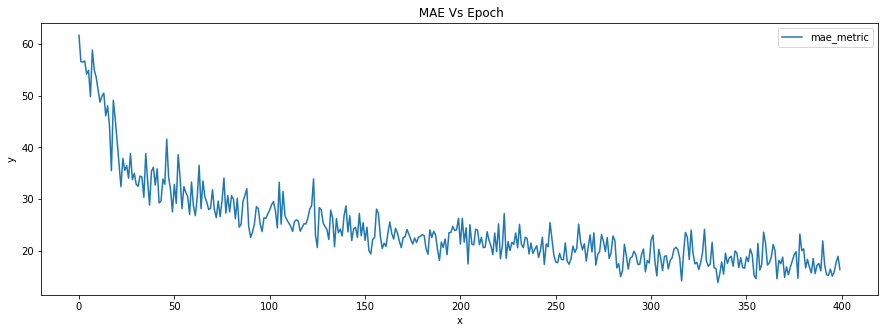

In [ ]:
 df[['Unnamed: 0','mae_metric']].plot( x= 'Unnamed: 0',  xlabel = 'x', ylabel = 'y', title = ' MAE Vs Epoch',figsize=(15,5) )
 plt.savefig(base_to_save+'/MAE .png')

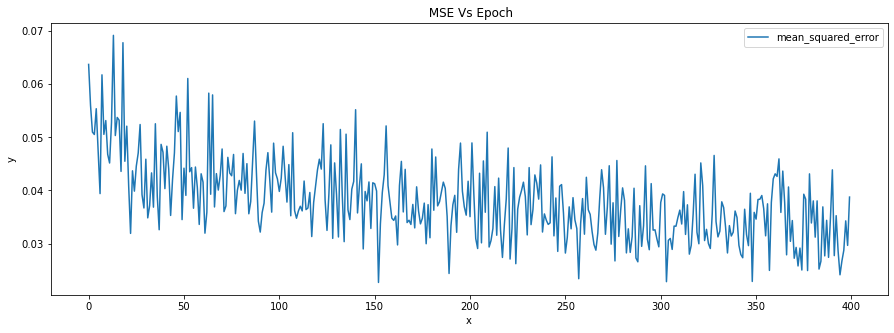

In [ ]:
df[['Unnamed: 0','mean_squared_error']].plot( x= 'Unnamed: 0',  xlabel = 'x', ylabel = 'y', title = ' MSE Vs Epoch',figsize=(15,5) )
plt.savefig(base_to_save+'/MSE .png')

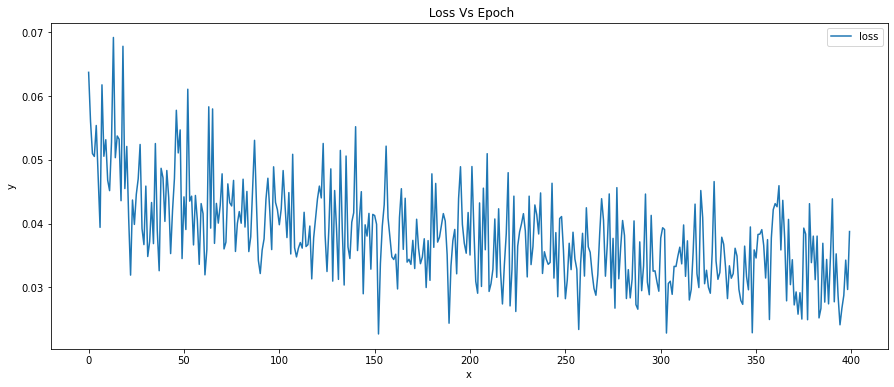

In [ ]:
df[['Unnamed: 0','loss']].plot( x= 'Unnamed: 0',  xlabel = 'x', ylabel = 'y', title = ' Loss Vs Epoch',figsize=(15,6) )
plt.savefig(base_to_save+'/Loss .png')

In [ ]:
import tensorflow as tf

In [ ]:
plot_model(model,to_file = base_to_save+"/"+'csrnet_final.png',show_shapes= True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
loaded_model = load_json_model(base_to_save +"/"+"csrnet_shanghaitechA_task1.h5", base_to_save +"/csrnet_shanghaitechA_task1.json")


In [ ]:

import glob
import PIL.Image as Image
from matplotlib import pyplot as plt
from matplotlib import cm as CM
import os
import numpy as np


def save_density_map(density_map, name):
    plt.figure(dpi=600)
    plt.axis('off')
    plt.margins(0, 0)
    plt.imshow(density_map, cmap=CM.jet)
    plt.savefig(name, dpi=600, bbox_inches='tight', pad_inches=0)


In [ ]:
# train_dataset
img_train, density_train = train_dataset.get_non_preprocess(0)
pil_img = Image.fromarray(img_train[0])

model = load_json_model(base_to_save+"/"+MODEL_PATH, base_to_save+"/"+MODEL_JSON_PATH)

print("label ", density_train.sum())

img_train = preprocess_input(img_train)
pred = model.predict(img_train)
pred = loaded_model.predict(img_train)

print("predict ", np.squeeze(pred[0], axis=2).shape, np.squeeze(pred[0], axis=2).sum())

print("------------")

label  601.05316
predict  (51, 55) 3716.1533
------------


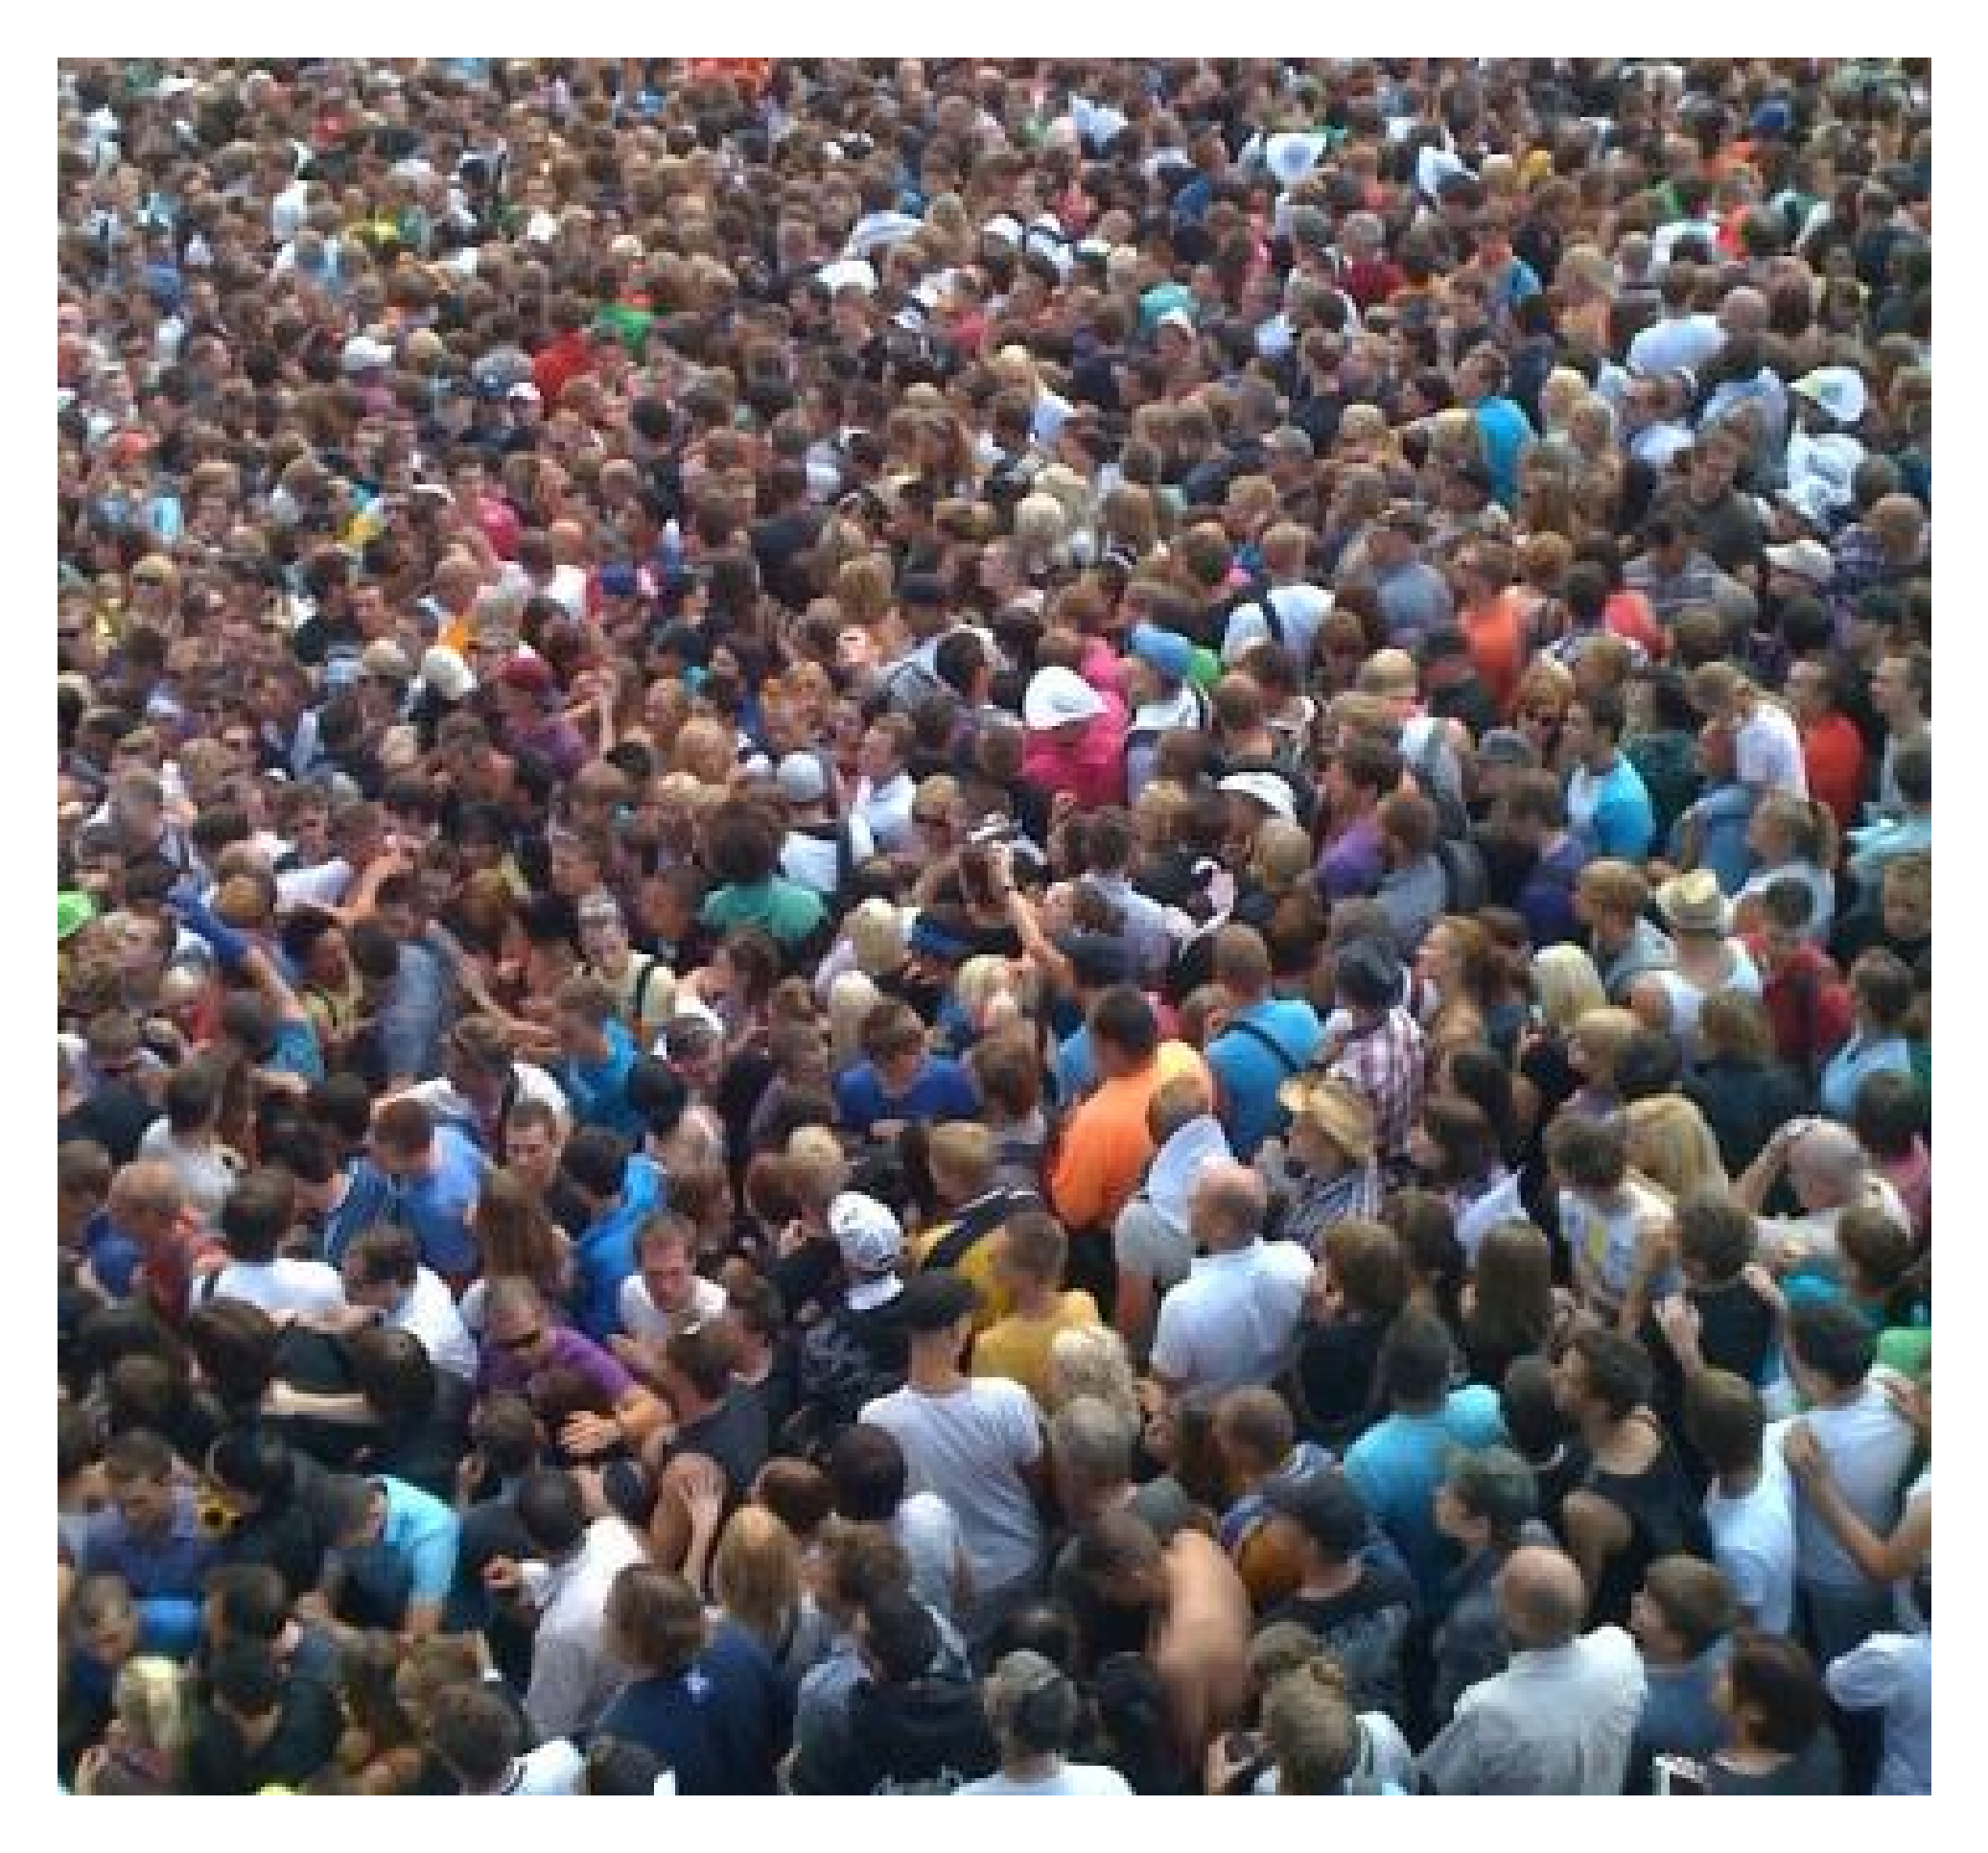

In [ ]:
pil_img.save("train.png")
from matplotlib import pyplot as plt


plt.figure(dpi=600)
plt.axis('off')
plt.margins(0,0)
plt.imshow(Image.open("train.png"))

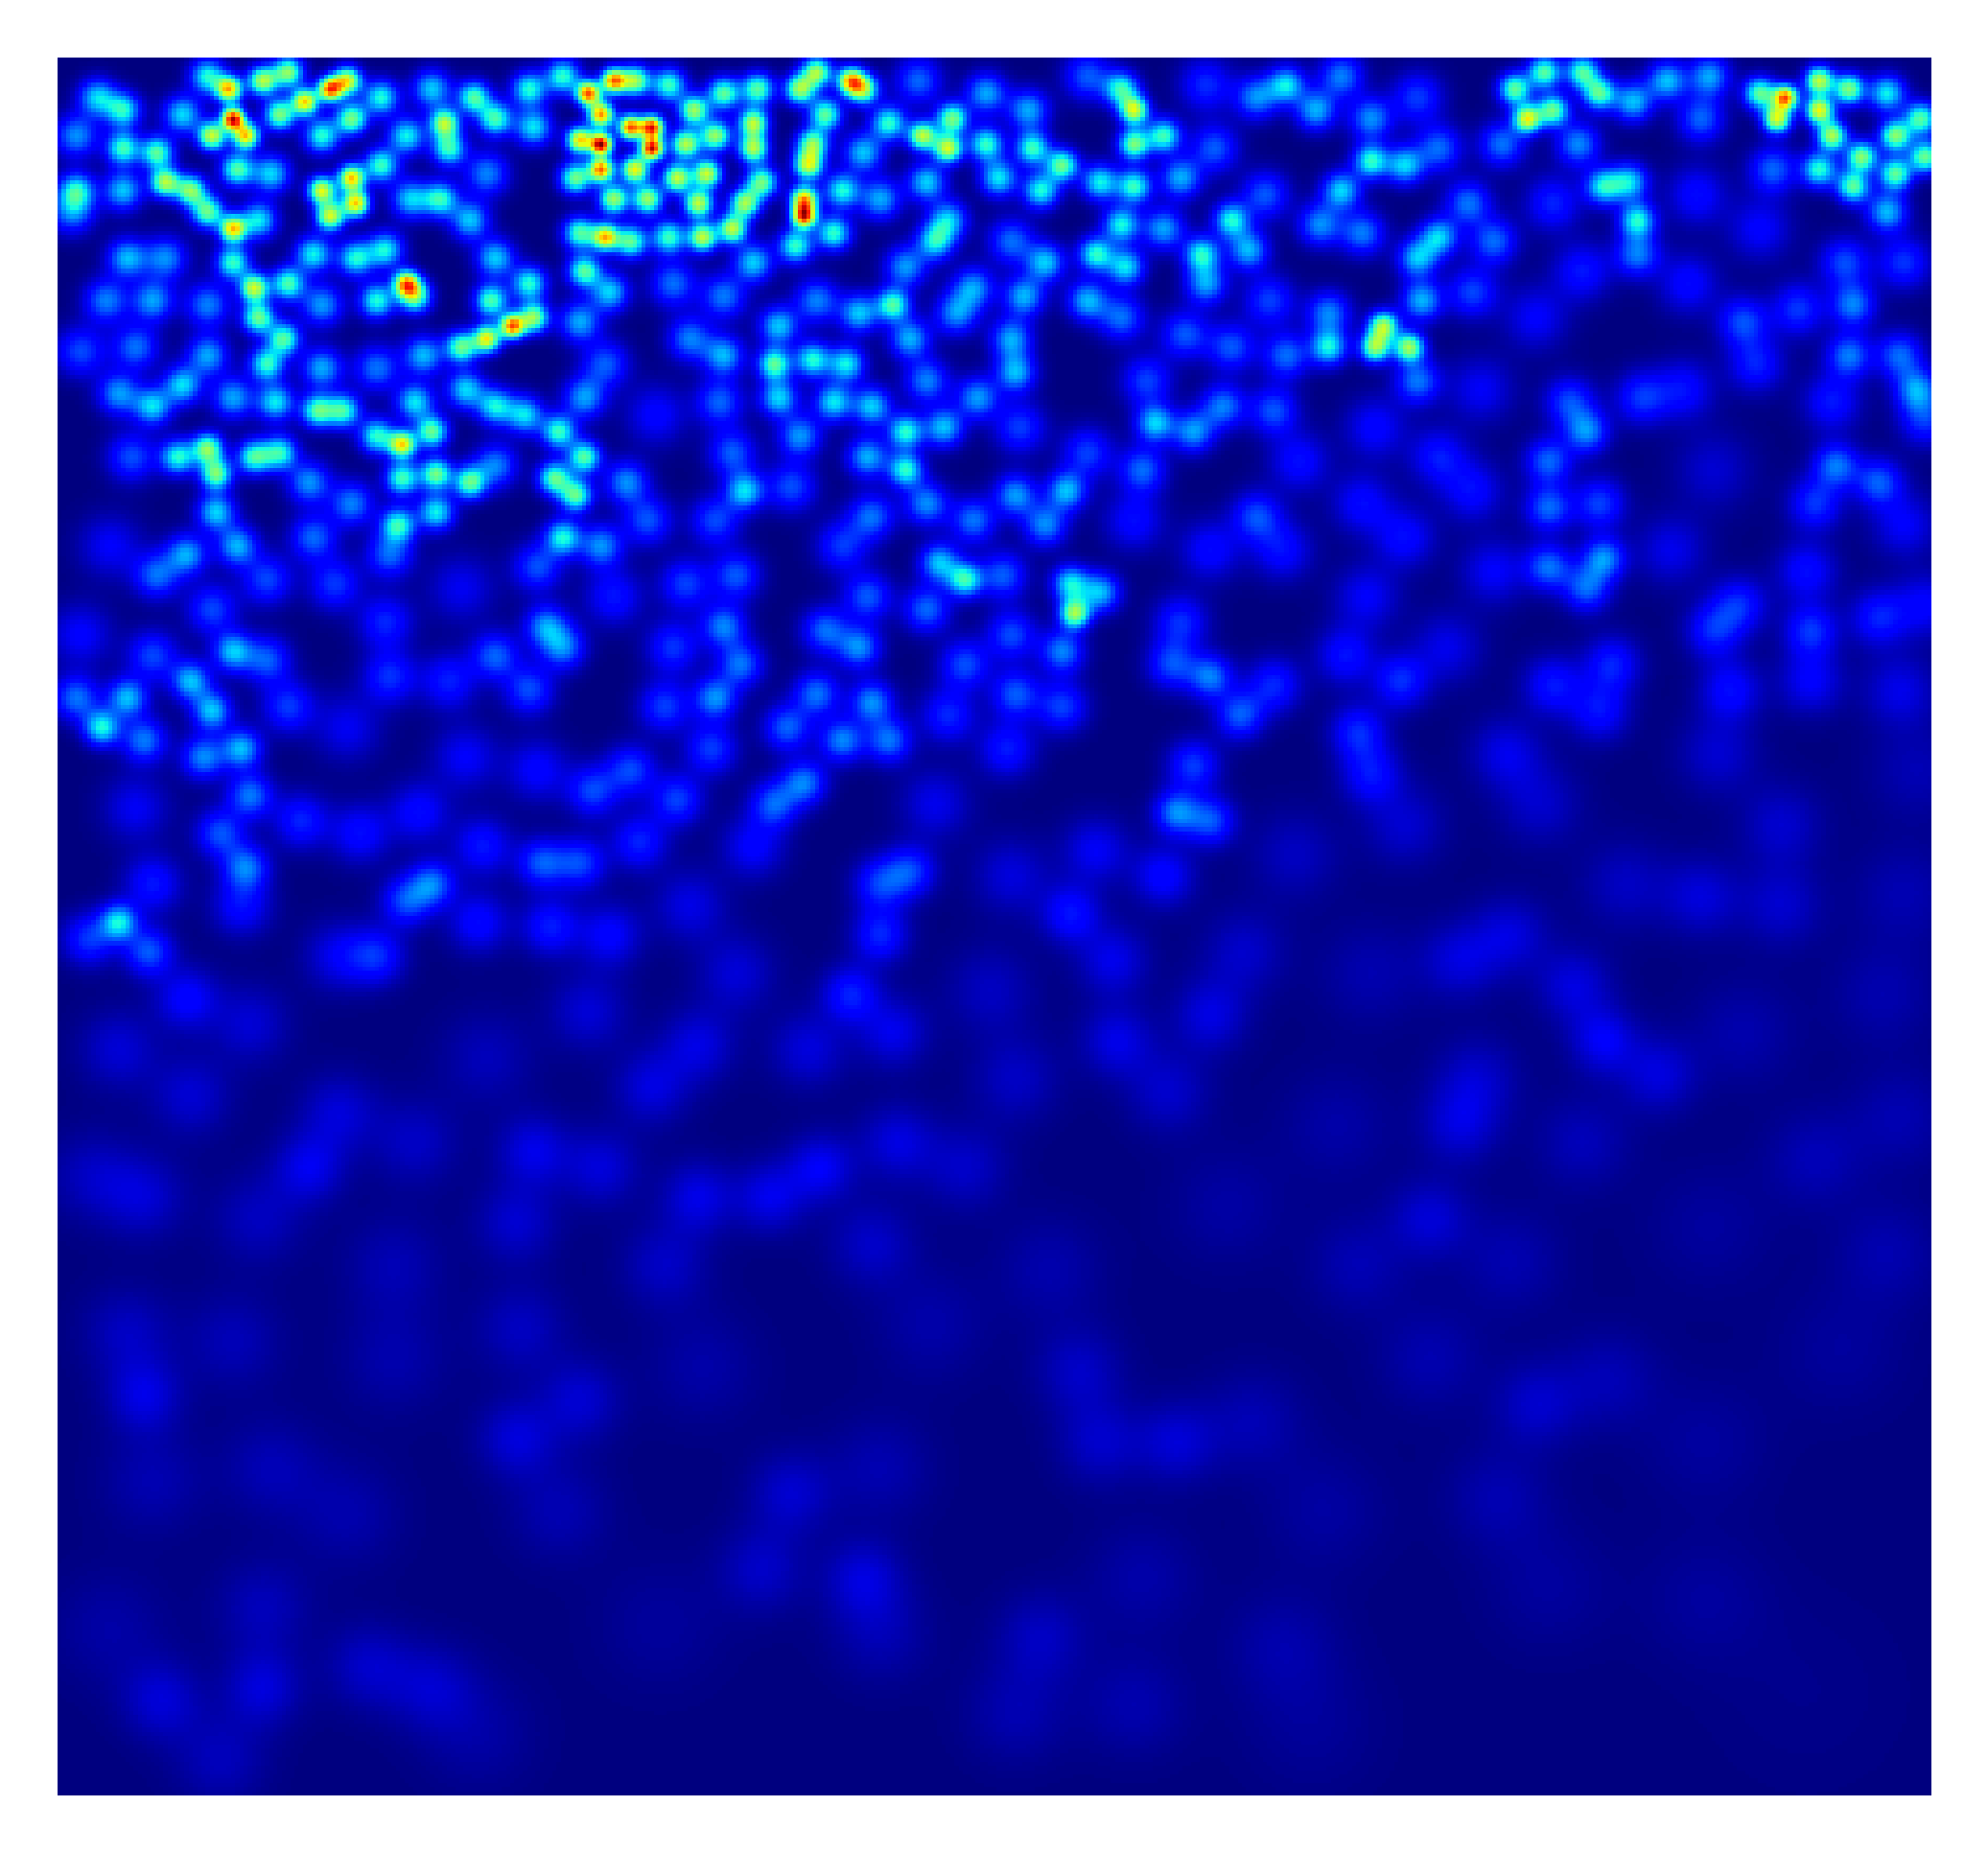

In [ ]:
save_density_map(np.squeeze(density_train[0], axis=2), "ground-truth_label.png")

In [ ]:
np.squeeze(pred[0], axis=2)

array([[5.4248805e+00, 6.1584420e+00, 5.3828497e+00, ..., 3.9154246e+00,
        5.7176781e+00, 5.7009584e-01],
       [5.2854409e+00, 4.4415879e+00, 4.9724827e+00, ..., 7.5070744e+00,
        7.9618239e+00, 6.6616850e+00],
       [6.3031793e+00, 8.6741352e+00, 4.6423678e+00, ..., 4.7993679e+00,
        7.2913260e+00, 3.3047936e+00],
       ...,
       [0.0000000e+00, 3.3998290e-01, 5.8372080e-01, ..., 6.3487850e-03,
        8.7990761e-03, 2.5100872e-02],
       [2.5724268e-01, 5.7929122e-01, 5.2407390e-01, ..., 2.8856877e-02,
        8.0251679e-02, 5.8191154e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# save_density_map(np.squeeze(pred[0], axis=2), "predicted density map.png")

In [ ]:
pred[0].shape

(51, 55, 1)

In [ ]:
np.savetxt("pred_np.txt",np.squeeze(density_train[0], axis=2))

In [ ]:
val_dataset = DatasetSequence(val_img_path, val_density_path, same_size_density=False)

In [ ]:
n = 0
mae = 0
mse = 0
for i in tqdm(range(len(val_dataset))):
    img, density = val_dataset[i]
    # img = preprocess_input(img)
    pred = model.predict(img)
    pred_values = pred.sum()
    truth = density.sum()
    mae = mae + abs(truth - pred_values)
    n += 1
    mse = mse + (truth - pred_values) * (truth - pred_values)

val_result_mae = mae / n
val_result_mse = np.sqrt(mse/n)
print('val mae ', val_result_mae)
print('val mse ', val_result_mse)

  4%|█████▋                                                                                                                                                        | 1/28 [00:03<01:21,  3.00s/it]

  7%|███████████▎                                                                                                                                                  | 2/28 [00:06<01:27,  3.38s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:52<00:00,  1.87s/it]

val mae  206.17291218893868
val mse  354.527389900969


# TEST DATA

In [ ]:

# train_img_path, val_img_path = get_train_val_list(DATA_PATH)
# train_density_path = create_density_path_list(train_img_path)

test_img_path = get_test_list(TEST_PATH)
test_density_path =create_density_path_list(test_img_path)
test_dataset = DatasetSequence(test_img_path, test_density_path, same_size_density=False)
model.compile(loss='mse', optimizer='adam',metrics=[mae_metric, mean_squared_error,psnr,iou])
model.evaluate(test_dataset)

test size  182
182
182/182 [==============================] - 211s 1s/step - loss: 731.2635 - mae_metric: 771.3218 - mean_squared_error: 1097.1715 - psnr: 21.1391 - iou: 0.9402


[731.2634887695312,
 771.32177734375,
 1097.1715087890625,
 21.139102935791016,
 0.9401628375053406]

In [ ]:
n = 0
mae = 0
mse = 0
for i in tqdm(range(len(test_dataset))):
    img, density = test_dataset[i]
    # img = preprocess_input(img)
    pred = model.predict(img)
    pred_values = pred.sum()
    truth = density.sum()
    mae = mae + abs(truth - pred_values)
    n += 1
    mse += (truth - pred_values) * (truth - pred_values)
mae = mae / n
mse = np.sqrt(mse / n)
print("\n MAE is ", mae)
print("\n MSE is ",mse)




100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:15<00:00, 11.55it/s]


 MAE is  771.3215578519381

 MSE is  8536.801202667248


In [ ]:
import cv2
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json

def load_model(json_path,h5_path):
    # Function to load and return neural network model 
    json_file = open(json_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(h5_path)
    return loaded_model

def create_img(path):
    #Function to load,normalize and return image 
    print(path)
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im

def predict(img_path,json_path,h5_path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    model = load_model(json_path,h5_path)
    image = create_img(img_path)
    ans = model.predict(image)
    count = np.sum(ans)
    return count,image,ans

In [ ]:
location = 'C:/CSRNET_output_storage/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/images/IMG_3.jpg'
ans,img,hmap = predict(img_path=location,
                       json_path=json_path,
                       h5_path=path)

C:/CSRNET_output_storage/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/images/IMG_3.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


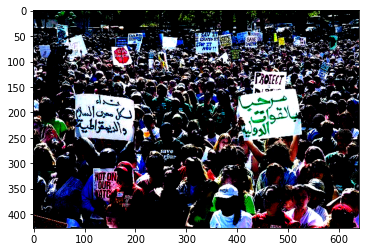

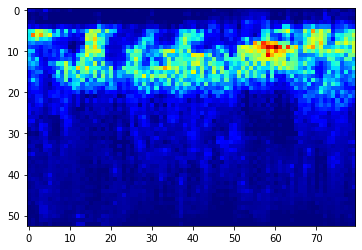

In [ ]:
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()

In [ ]:
temp = h5py.File('C:/CSRNET_output_storage/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/ground-truth-h5/IMG_3.h5' , 'r')
temp_1 = np.asarray(temp['density'])
#plt.imshow(temp_1,cmap = c.jet)
print("Calculated Count By Model:",int(ans)+1)

print("Original Count : ",int(np.sum(temp_1)) + 1)


Calculated Count By Model: 329
Original Count :  295
